In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
content_image = load_image('andy.png')
style_image = load_image('monet.jpeg')

In [5]:
content_image.shape

TensorShape([1, 578, 699, 3])

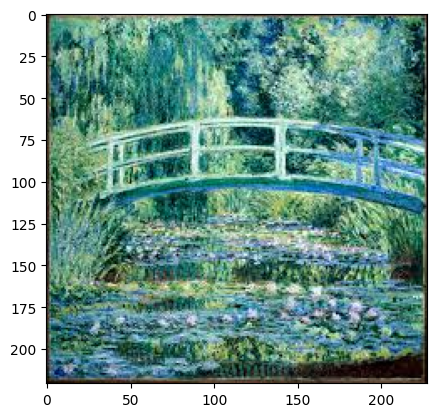

In [6]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [7]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

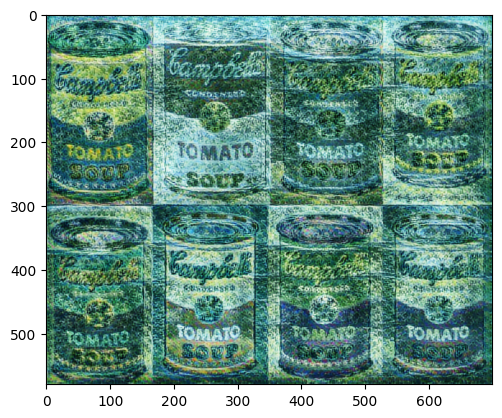

In [8]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [9]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

In [10]:
import tensorflow as tf

In [11]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from pathlib import Path
import shutil
import numpy as np
import operator
from dataclasses import dataclass
import time
from datetime import timedelta

In [16]:
import tarfile

# Extract the tar.gz file
with tarfile.open('/content/arbitrary-image-stylization-v1-tensorflow1-256-v2.tar.gz', 'r:gz') as tar:
    tar.extractall('/content/my_model') # Extract to a directory named 'my_model'

# Update the path in hub.load
@dataclass
class G:
    env="kaggle"
    if env == "kaggle":
        style_img_dir_path="/content/generated_img.jpg"
        content_img_dir_path="/content/monet.jpeg"
        # Load from the extracted directory
        model = hub.load('/content/my_model')
    else:
        model  = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
        style_img_dir_path = os.getcwd()+"/content/monet.jpeg"
        content_img_dir_path=os.getcwd()+"/content/generated_img.jpg"

In [18]:
content_image = load_image('/content/andy.png')
style_image = load_image('/content/monet.jpeg')

In [19]:
stylized_image = G.model(tf.constant(content_image), tf.constant(style_image))[0]

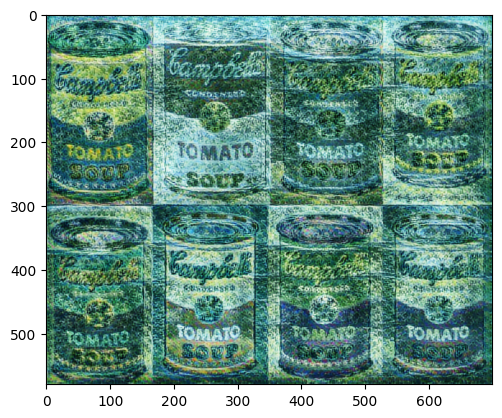

True

In [20]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

# Save the stylized image
cv2.imwrite('stylized_output.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

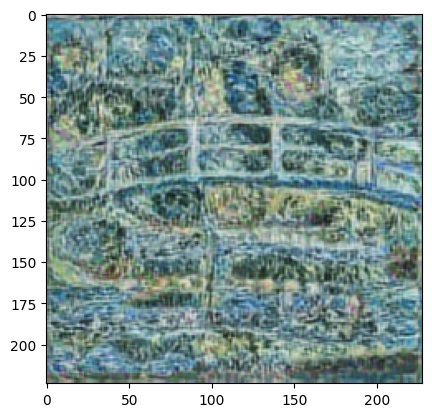

True

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tarfile
from dataclasses import dataclass

# Extract the tar.gz file
with tarfile.open('/content/arbitrary-image-stylization-v1-tensorflow1-256-v2.tar.gz', 'r:gz') as tar:
    tar.extractall('/content/my_model') # Extract to a directory named 'my_model'

# Update the path in hub.load
@dataclass
class G:
    env="kaggle"
    if env == "kaggle":
        style_img_dir_path="/content/generated_img.jpg"
        content_img_dir_path="/content/monet.jpeg"
        # Load from the extracted directory
        model = hub.load('/content/my_model')
    else:
        model  = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
        style_img_dir_path = os.getcwd()+"/content/monet.jpeg"
        content_img_dir_path=os.getcwd()+"/content/generated_img.jpg"

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

# Load your content and style images
content_image = load_image('/content/monet.jpeg')
style_image = load_image('/content/generated_img.jpg')

# Apply the stylization
stylized_image = G.model(tf.constant(content_image), tf.constant(style_image))[0]

# Display and save the stylized image
plt.imshow(np.squeeze(stylized_image))
plt.show()

cv2.imwrite('stylized_output.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))